Loading up to 5 images from: C:\Users\71591\Desktop\dataset\train
Loaded 5 images from C:\Users\71591\Desktop\dataset\train
Loading up to 5 images from: C:\Users\71591\Desktop\dataset\test
Loaded 5 images from C:\Users\71591\Desktop\dataset\test


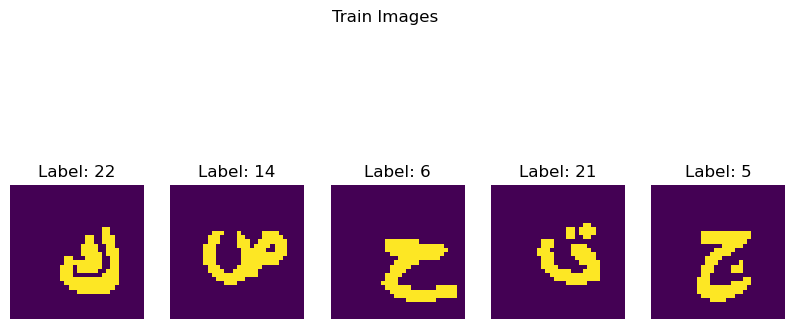

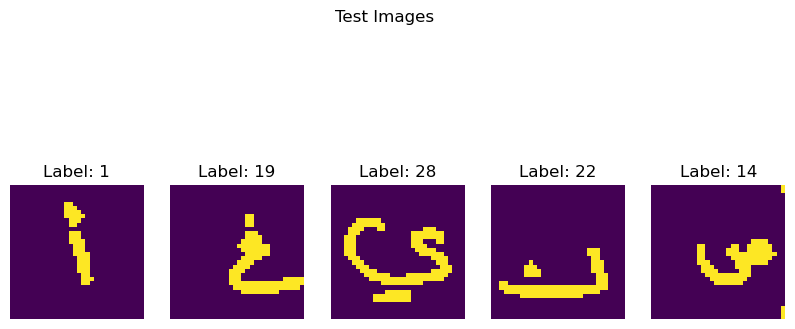

In [3]:
import os
from PIL import Image
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to load a limited number of images and extract labels
def load_images_from_folder(folder_path, limit=5):
    images = []
    labels = []
    processed_count = 0
    
    # Get the list of files in the folder
    files = [f for f in os.listdir(folder_path) if f.endswith(".jpg") or f.endswith(".png")]
    
    # Shuffle the list to display random images
    random.shuffle(files)
    
    print(f"Loading up to {limit} images from: {folder_path}")
    
    for filename in files:
        if processed_count >= limit:
            break  # Stop loading once the limit is reached
        
        label = filename.split('_')[-1].split('.')[0]  # Extracting label part from filename
        img_path = os.path.join(folder_path, filename)

        try:
            # Load the image
            image = Image.open(img_path)
            images.append(np.array(image))
            labels.append(label)
            processed_count += 1
        except Exception as e:
            print(f"Error loading image {filename}: {e}")
    
    print(f"Loaded {len(images)} images from {folder_path}")
    return images, labels

# Paths for train and test folders
train_folder = r"C:\Users\71591\Desktop\dataset\train"
test_folder = r"C:\Users\71591\Desktop\dataset\test"

# Loading a few train and test images and labels
train_images, train_labels = load_images_from_folder(train_folder, limit=5)
test_images, test_labels = load_images_from_folder(test_folder, limit=5)

# Function to display loaded images
def display_images(images, labels, title="Images"):
    plt.figure(figsize=(10, 5))
    for i, image in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(image)
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Display a few images from train and test sets
display_images(train_images, train_labels, title="Train Images")
display_images(test_images, test_labels, title="Test Images")


In [4]:
# Function to flatten the images ((2D TO 1D))
def flatten_images(images):
    flattened_images = [image.flatten() for image in images]
    return np.array(flattened_images)

# Flatten the train and test images
train_images_flattened = flatten_images(train_images)
test_images_flattened = flatten_images(test_images)

# Display shapes 
(train_images_flattened.shape, test_images_flattened.shape)


((5, 1024), (5, 1024))

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create and train the SVM model
svm_model = SVC(kernel='linear')  # Using a linear kernel, but you can experiment with others
svm_model.fit(train_images_flattened, train_labels)


SVC(kernel='linear')

In [6]:
# Make predictions on the test set
test_predictions = svm_model.predict(test_images_flattened)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)

# Display accuracy
accuracy


0.2

In [7]:
# Train SVM model with polynomial kernel
svm_poly_model = SVC(kernel='poly', degree=3)  # Degree can be adjusted
svm_poly_model.fit(train_images_flattened, train_labels)

SVC(kernel='poly')

In [8]:
# Make predictions on the test set
test_predictions_poly = svm_poly_model.predict(test_images_flattened)

# Calculate accuracy
accuracy_poly = accuracy_score(test_labels, test_predictions_poly)

# Display accuracy
accuracy_poly

0.0

In [9]:
# Train SVM model with RBF kernel
svm_rbf_model = SVC(kernel='rbf', gamma='scale')  # Gamma can be adjusted
svm_rbf_model.fit(train_images_flattened, train_labels)


SVC()

In [10]:
# Make predictions on the test set
test_predictions_rbf = svm_rbf_model.predict(test_images_flattened)

# Calculate accuracy
accuracy_rbf = accuracy_score(test_labels, test_predictions_rbf)

# Display accuracy
accuracy_rbf

0.2

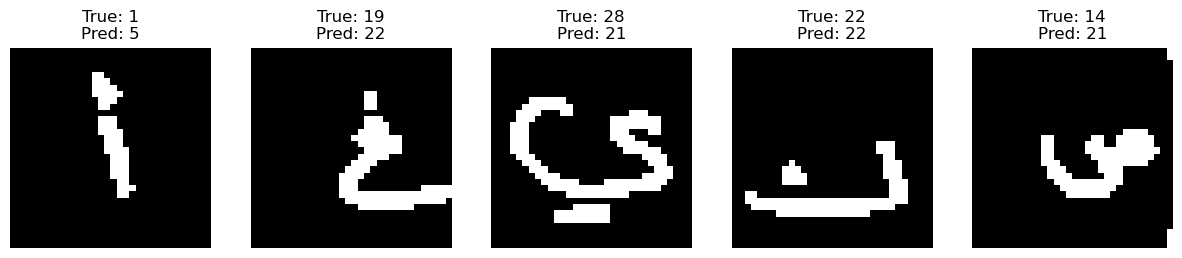

In [11]:
import matplotlib.pyplot as plt

# Function to display images with their predictions and true labels
def display_predictions(images, true_labels, predictions, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i in range(num_samples):
        ax = axes[i]
        ax.imshow(images[i].reshape(32, 32), cmap='gray')  # Adjust reshape dimensions as needed
        ax.set_title(f"True: {true_labels[i]}\nPred: {predictions[i]}")
        ax.axis('off')
    plt.show()

# Display predictions for a few test images
display_predictions(test_images_flattened, test_labels, test_predictions)


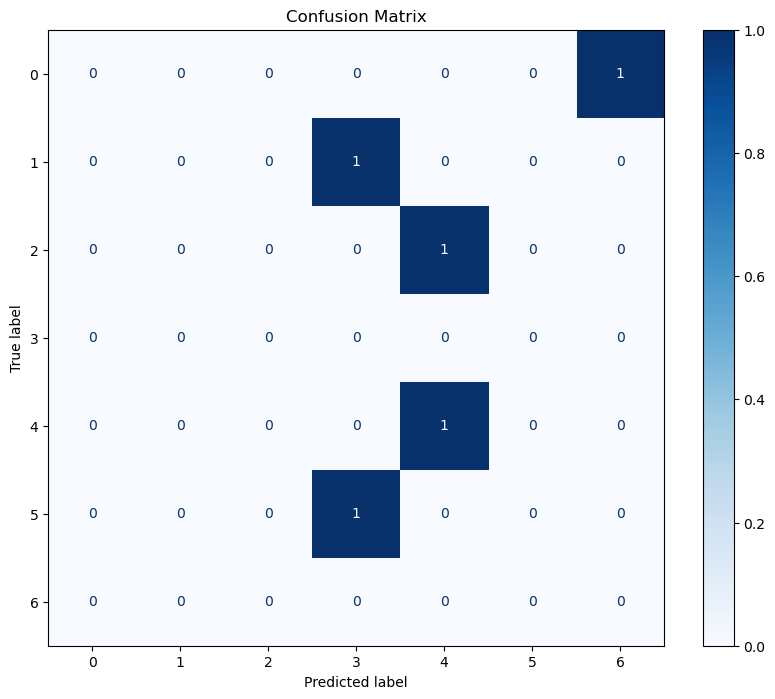

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# test_labels: true labels for test set


# Generate the confusion matrix
cm = confusion_matrix(test_labels, test_predictions_rbf)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title('Confusion Matrix')
plt.show()


In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd
from IPython.display import display

# Assuming these variables are already defined:
# test_labels: true labels for test set
# test_predictions_rbf: predicted labels from your SVM model

# Generate the confusion matrix
cm = confusion_matrix(test_labels, test_predictions_rbf)

# Convert the confusion matrix to a pandas DataFrame for better readability
cm_df = pd.DataFrame(cm, 
                     index=[f'Class {i}' for i in range(cm.shape[0])], 
                     columns=[f'Predicted {i}' for i in range(cm.shape[1])])

# Display the confusion matrix as a table
display(cm_df)


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5,Predicted 6
Class 0,0,0,0,0,0,0,1
Class 1,0,0,0,1,0,0,0
Class 2,0,0,0,0,1,0,0
Class 3,0,0,0,0,0,0,0
Class 4,0,0,0,0,1,0,0
Class 5,0,0,0,1,0,0,0
Class 6,0,0,0,0,0,0,0
